---

# Analisi delle interazioni

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd   
from scipy import stats

interactions = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/interacions/facebook_outreach_vs_interaction.csv', usecols=['post_id', 'alpha', 'outreach'])
posts = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_posts.csv', usecols=['created_time', 'page_id', 'post_id'], encoding='ISO-8859-1')

posts_dict = posts.set_index('post_id').T.to_dict()

interactions['created_time'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('created_time', None))
interactions['page_id'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('page_id', None))

interactions=interactions.dropna()


/tmp/ipykernel_9864/1366272505.py:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  posts_dict = posts.set_index('post_id').T.to_dict()


Parto analizzando una singola pagina.

/tmp/ipykernel_6238/2713926660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_interactions['created_time'] = pd.to_datetime(page_interactions['created_time']).copy()
/tmp/ipykernel_6238/2713926660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_interactions['year'] = page_interactions['created_time'].dt.year
/tmp/ipykernel_6238/2713926660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

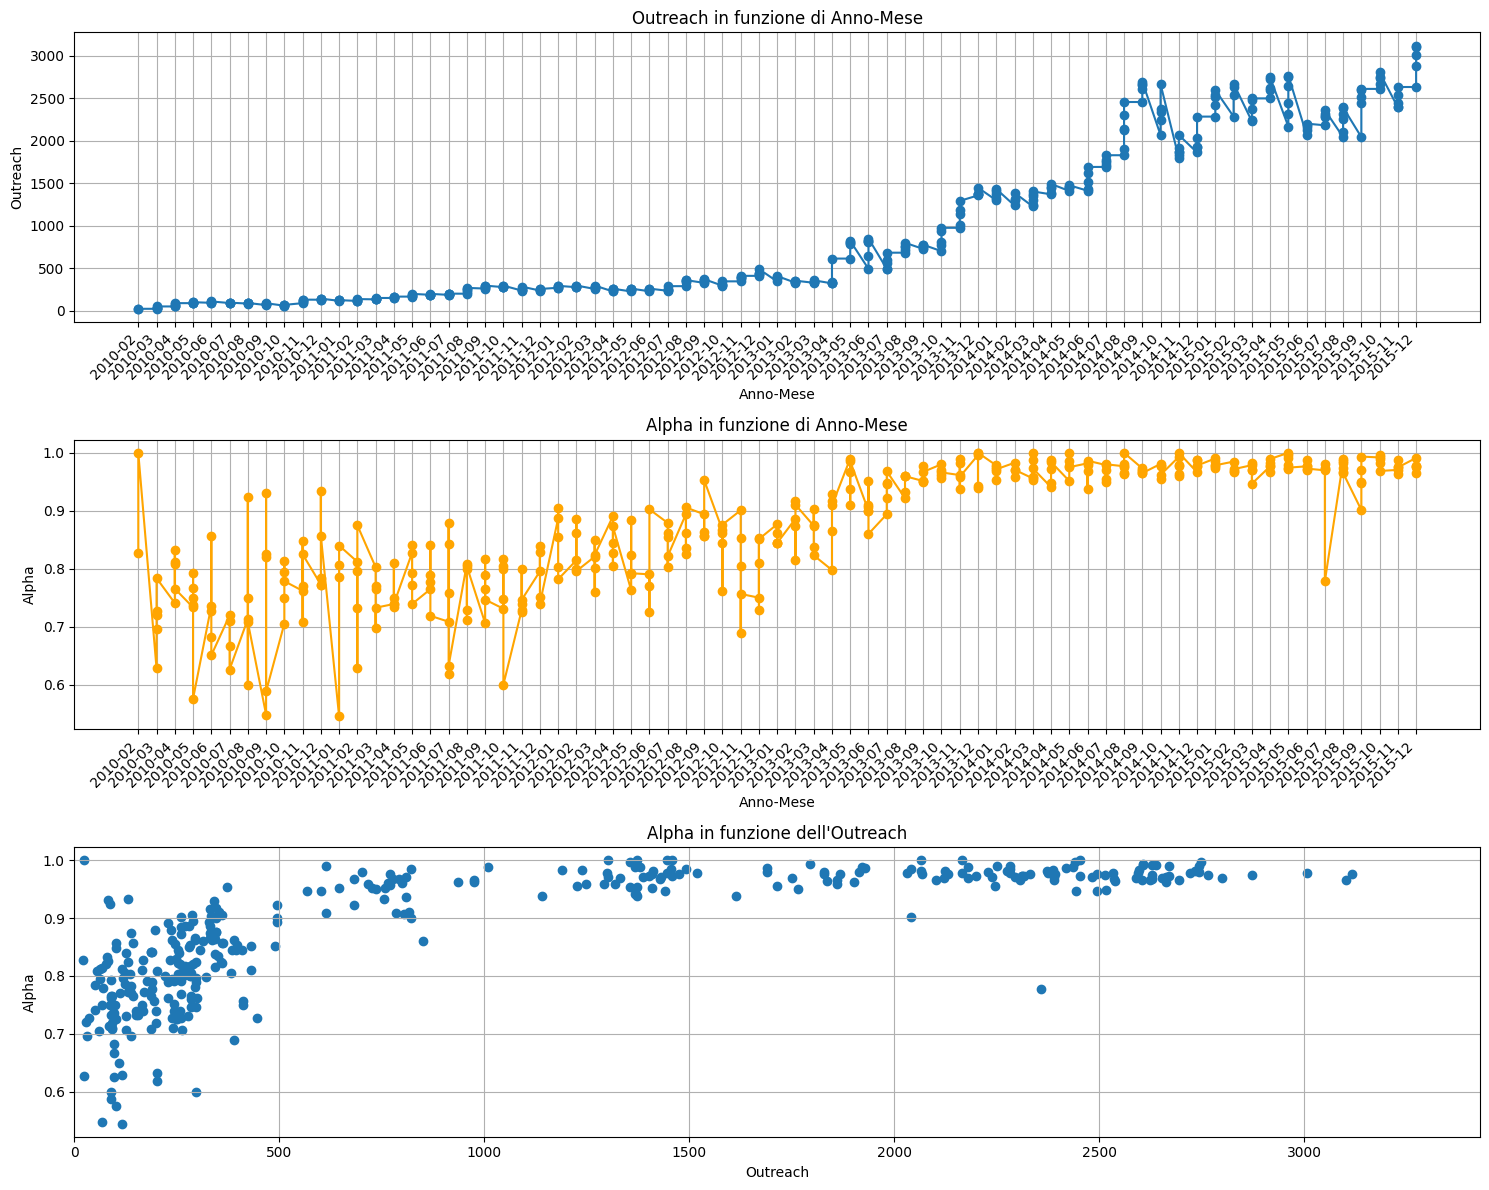

Test di Kolmogorov-Smirnov: statistic = 0.45572014955372925, p-value = 0.0


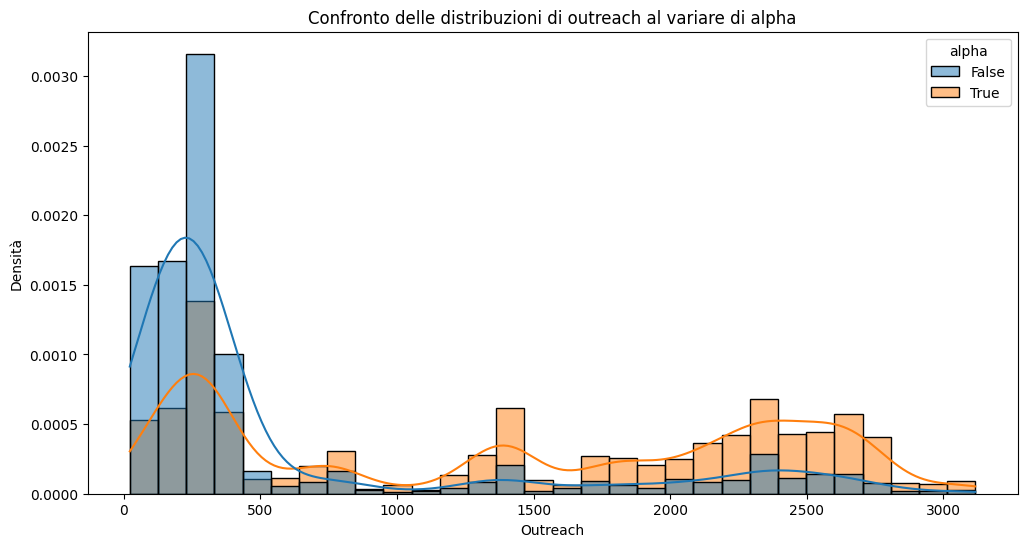

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Supponendo che 'interactions' sia già definito
page_interactions = interactions[interactions['page_id'] == 8969907778]
page_interactions['created_time'] = pd.to_datetime(page_interactions['created_time']).copy()
page_interactions['year'] = page_interactions['created_time'].dt.year
page_interactions['month'] = page_interactions['created_time'].dt.month
page_interactions['year_month'] = page_interactions['created_time'].dt.to_period('M')
alpha_month_outreach = page_interactions.groupby(['year_month', 'outreach'])['alpha'].mean().reset_index()

# Calcola la data in cui l'outreach supera 10.000
outreach_over_10000 = alpha_month_outreach[alpha_month_outreach['outreach'] > 100000]

# Assicurati che ci sia almeno un valore che supera 10.000
if not outreach_over_10000.empty
    date_outreach_reaches_10000 = outreach_over_10000['year_month'].astype(str).iloc[0]
else:
    date_outreach_reaches_10000 = None

plt.figure(figsize=(15, 12))

# Primo grafico
plt.subplot(3, 1, 1)
plt.plot(alpha_month_outreach['year_month'].astype(str), alpha_month_outreach['outreach'], marker='o')
plt.title('Outreach in funzione di Anno-Mese')
plt.xlabel('Anno-Mese')
plt.ylabel('Outreach')

# Aggiungi una linea verticale se la data è disponibile
if date_outreach_reaches_10000:
    plt.axvline(x=date_outreach_reaches_10000, color='pink', linestyle='--', label='Outreach supera 10,000')
    plt.legend()

plt.grid()
plt.xticks(rotation=45, ha='right')  

# Secondo grafico
plt.subplot(3, 1, 2)
plt.plot(alpha_month_outreach['year_month'].astype(str), alpha_month_outreach['alpha'], marker='o', color='orange')
plt.title('Alpha in funzione di Anno-Mese')
plt.xlabel('Anno-Mese')
plt.ylabel('Alpha')

# Aggiungi una linea verticale se la data è disponibile
if date_outreach_reaches_10000:
    plt.axvline(x=date_outreach_reaches_10000, color='pink', linestyle='--', label='Outreach supera 10,000')
    plt.legend()

plt.grid()
plt.xticks(rotation=45, ha='right')

# Terzo grafico
plt.subplot(3, 1, 3)
plt.scatter(alpha_month_outreach['outreach'], alpha_month_outreach['alpha'])
plt.title('Alpha in funzione dell\'Outreach')
plt.xlabel('Outreach')
plt.xlim(0,1.1*max(alpha_month_outreach['outreach']))
plt.ylabel('Alpha')
plt.axvline(x=100000, color='pink', linestyle='--', label='Outreach supera 10,000')
plt.grid()

plt.tight_layout()
plt.show()
### 

page_interactions=page_interactions.dropna()
alpha_values = page_interactions['alpha'].unique()
outreach_alpha1 = page_interactions[page_interactions['alpha'] == alpha_values[0]]['outreach']
outreach_alpha2 = page_interactions[page_interactions['alpha'] == alpha_values[1]]['outreach']

ks_statistic, p_value = stats.ks_2samp(outreach_alpha1, outreach_alpha2)
print(f'Test di Kolmogorov-Smirnov: statistic = {ks_statistic}, p-value = {p_value}')

plt.figure(figsize=(12, 6))
sns.histplot(data=page_interactions, x='outreach', hue='alpha', bins=30, stat='density', common_norm=False, alpha=0.5, kde=True)
plt.title('Confronto delle distribuzioni di outreach al variare di alpha')
plt.xlabel('Outreach')
plt.ylabel('Densità')
plt.show()

Applico il test di significatività del size effect a tutte le pagine, quante sono significative?

In [26]:
import numpy as np
import pandas as pd
from scipy import stats

# Inizializza una lista per i risultati
results = []
page_ids = interactions['page_id'].unique()

for page_id in page_ids:
    page_interactions = interactions[interactions['page_id'] == page_id]
    page_interactions = page_interactions.dropna()
    
    if len(page_interactions) == 0:
        continue
    
    alpha_vals = page_interactions['alpha'].unique()
    alpha_vals_sorted = np.sort(alpha_vals)
    
    outreach_per_alpha = [page_interactions[page_interactions['alpha'] == val]['outreach'] for val in alpha_vals_sorted]
    
    # Esegui un test t unilaterale se ci sono più di un valore di alpha
    if len(outreach_per_alpha) > 1:
        t_statistic, t_pvalue = stats.ttest_ind(outreach_per_alpha[0], outreach_per_alpha[1], alternative='less')
        significant = t_pvalue < 0.05
        
        results.append({
            'page_id': page_id,
            't_statistic': t_statistic,
            't_pvalue': t_pvalue,
            'significant': significant
        })
    else:
        results.append({
            'page_id': page_id,
            't_statistic': None,
            't_pvalue': None,
            'significant': False
        })

# Crea un DataFrame dai risultati
results_df = pd.DataFrame(results)

# Stampa il DataFrame dei risultati
print(results_df)

# Conta il numero di pagine con differenze significative
num_significant = results_df['significant'].sum()
print(f"Numero di pagine con differenze significative: {num_significant}")
print(f"Numero di pagine con differenze non significative: {len(results_df.dropna())-num_significant}")

            page_id  t_statistic      t_pvalue  significant
0       35281584398   -20.633051  9.333607e-95         True
1   113349742029506    -2.232875  1.295843e-02         True
2        7155422274   -71.335316  0.000000e+00         True
3       67175109350   159.681455  1.000000e+00        False
4       63811549237  -254.652851  0.000000e+00         True
..              ...          ...           ...          ...
87  152535288239280          NaN           NaN        False
88      55107646487          NaN           NaN        False
89  146662198720301          NaN           NaN        False
90  110299945719263          NaN           NaN        False
91  215108901846669          NaN           NaN        False

[92 rows x 4 columns]
Numero di pagine con differenze significative: 41
Numero di pagine con differenze non significative: 42


/home/jacoponudo/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
pages

,page_id,t_statistic,t_pvalue,significant,Unnamed: 0,TS_coverage(W),initial_class_size,initial_size,last_class_size,last_size,delta_growth,diff_days,growth_rate
0,35281584398,-20.633051,9.333607e-95,True,12,285,Basso,5.503750,Alto,3639.250000,3633.74625,1985.0,1.830603
1,113349742029506,-2.232875,1.295843e-02,True,46,226,Molto Basso,2.972500,Basso,46.140000,43.16750,1560.0,0.027671
2,7155422274,-71.335316,0.000000e+00,True,2,306,Alto,47.321250,Alto,47697.250000,47649.92875,2129.0,22.381366
3,67175109350,159.681455,1.000000e+00,False,20,304,Basso,6.932500,Medio,418.695000,411.76250,2118.0,0.194411
4,63811549237,-254.652851,0.000000e+00,True,19,190,Alto,12147.375000,Alto,428301.750000,416154.37500,1319.0,315.507487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,152535288239280,NaN,NaN,False,63,93,Molto Basso,2.631944,Molto Basso,2.631944,0.00000,464.0,0.000000
88,55107646487,NaN,NaN,False,16,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,146662198720301,NaN,NaN,False,58,106,Molto Basso,0.000000,Molto Basso,0.000000,0.00000,0.0,NaN
90,110299945719263,NaN,NaN,False,43,135,Molto Basso,0.625000,Molto Basso,0.625000,0.00000,0.0,NaN


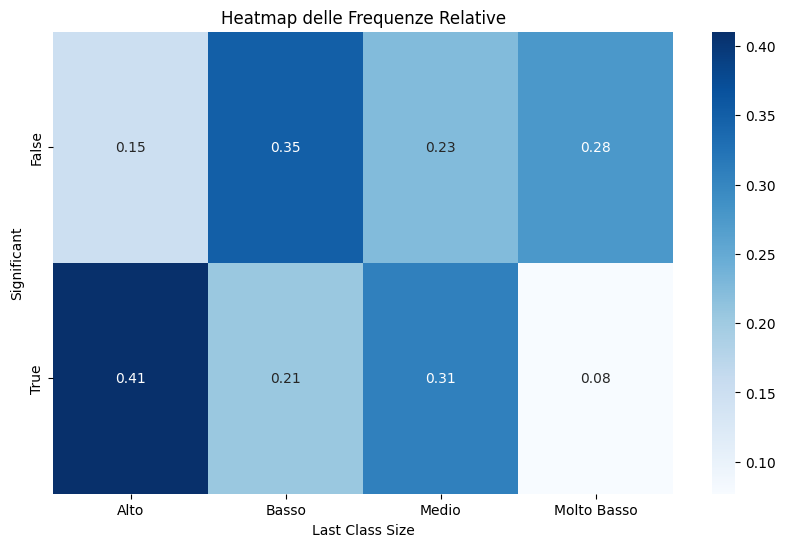

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i dati
pages = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_pages.csv')
pages = results_df.merge(pages, on='page_id', how='inner').dropna()

# Crea una tabella a doppia entrata
contingency_table = pd.crosstab(pages['significant'], pages['last_class_size'])

# Calcola le frequenze relative
relative_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crea una heatmap della tabella a doppia entrata con frequenze relative
plt.figure(figsize=(10, 6))
sns.heatmap(relative_table, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=relative_table.columns, yticklabels=relative_table.index)
plt.xlabel('Last Class Size')
plt.ylabel('Significant')
plt.title('Heatmap delle Frequenze Relative')
plt.show()


Per ciascuna pagina estraiamo delle informazioni che ne caratterizzano la crescita, e aggiungiamo la colonna della significatività del size effect. A questo punto possiamo vedere se il punto di partenza o quello di arrivo sono predittori del size effect, e se questo a determinate condizioni non si verifica.

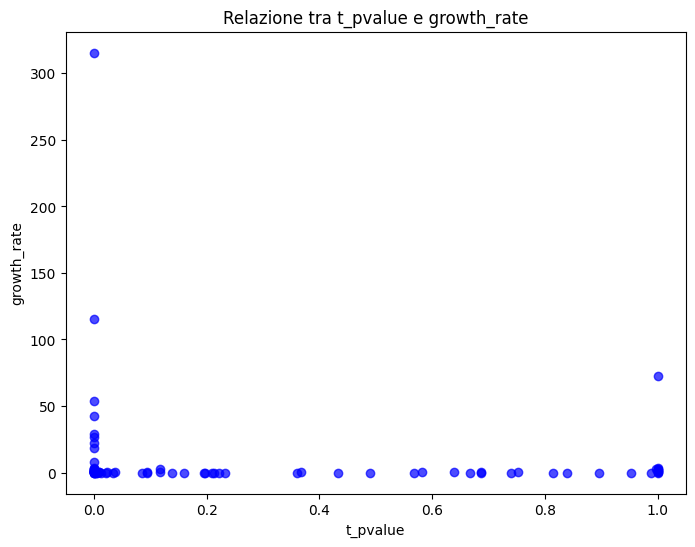

In [27]:
pages=pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_pages.csv')
pages = results_df.merge(pages, on='page_id', how='inner')
import matplotlib.pyplot as plt

# Seleziona le colonne
x = pages['t_pvalue']
y = pages['growth_rate']

# Crea il plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', alpha=0.7)

# Titoli e etichette (puoi modificarli secondo le tue preferenze)
plt.title('Relazione tra t_pvalue e growth_rate')
plt.xlabel('t_pvalue')
plt.ylabel('growth_rate')

# Mostra il plot
plt.show()



<Figure size 800x600 with 0 Axes>

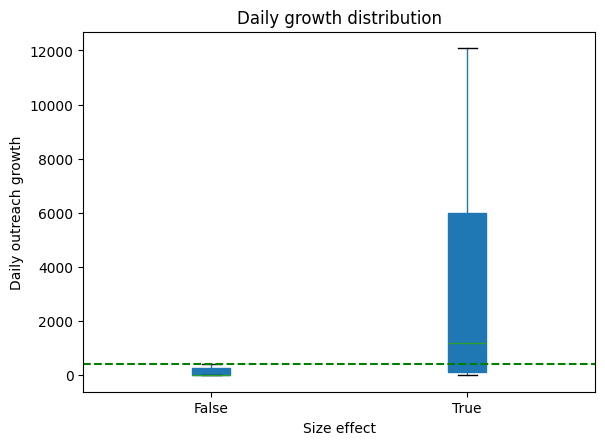

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
pages = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_pages.csv')

# Unisci i dataframe
pages = results_df.merge(pages, on='page_id', how='inner')

# Crea i boxplot
plt.figure(figsize=(8, 6))
pages.boxplot(column='delta_growth', by='significant', grid=False, patch_artist=True,showfliers=False)

# Titoli e etichette
plt.title('Daily growth distribution')
plt.suptitle('')  # Rimuove il titolo automatico del boxplot
plt.xlabel('Size effect')
plt.ylabel('Daily outreach growth')
plt.axhline(y=400, color='green', linestyle='--', label='no growth')

# Mostra il plot
plt.show()


Selezioniamo solo le pagine che hanno una crescita giornaliera pari a 0.5

In [31]:
pages

,page_id,t_statistic,t_pvalue,significant,Unnamed: 0,TS_coverage(W),initial_class_size,initial_size,last_class_size,last_size,delta_growth,diff_days,growth_rate
0,35281584398,-20.633051,9.333607e-95,True,12,285,Basso,5.503750,Alto,3639.250000,3633.74625,1985.0,1.830603
1,113349742029506,-2.232875,1.295843e-02,True,46,226,Molto Basso,2.972500,Basso,46.140000,43.16750,1560.0,0.027671
2,7155422274,-71.335316,0.000000e+00,True,2,306,Alto,47.321250,Alto,47697.250000,47649.92875,2129.0,22.381366
3,67175109350,159.681455,1.000000e+00,False,20,304,Basso,6.932500,Medio,418.695000,411.76250,2118.0,0.194411
4,63811549237,-254.652851,0.000000e+00,True,19,190,Alto,12147.375000,Alto,428301.750000,416154.37500,1319.0,315.507487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,152535288239280,NaN,NaN,False,63,93,Molto Basso,2.631944,Molto Basso,2.631944,0.00000,464.0,0.000000
88,55107646487,NaN,NaN,False,16,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,146662198720301,NaN,NaN,False,58,106,Molto Basso,0.000000,Molto Basso,0.000000,0.00000,0.0,NaN
90,110299945719263,NaN,NaN,False,43,135,Molto Basso,0.625000,Molto Basso,0.625000,0.00000,0.0,NaN


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Filtrare i dati per le pagine con delta_growth > 500
grown_pages = pages[pages['delta_growth'] > 500]['page_id']
interactions_on_grown_pages = interactions[interactions['page_id'].isin(grown_pages)][['page_id', 'alpha', 'outreach']]

# Creare un PDF per salvare i grafici senza log
with PdfPages('/home/jacoponudo/Documents/Size_effects/PLT/3_size_effect_pages/scatter_plots.pdf') as pdf:
    num_plots = len(grown_pages)
    cols = 3
    rows = 3

    for idx, page_id in enumerate(grown_pages):
        # Estrai il valore di initial_cat_size per il page_id corrente
        initial_cat_size = pages.loc[pages['page_id'] == page_id, 'last_class_size'].values[0]
        
        page_data = interactions_on_grown_pages[interactions_on_grown_pages['page_id'] == page_id]
        if not page_data.empty:
            page_grouped_data = page_data.groupby(['page_id', 'outreach'], as_index=False)['alpha'].mean()
            if idx % (cols * rows) == 0:
                plt.figure(figsize=(15, 10))

            plt.subplot(rows, cols, (idx % (cols * rows)) + 1)
            plt.scatter(page_grouped_data['outreach'], page_grouped_data['alpha'], alpha=0.7)
            plt.title(f'Page ID: {page_id} | Initial Cat Size: {initial_cat_size}', fontsize=5)
            plt.xlabel('Outreach', fontsize=4)
            plt.ylabel('Alpha (Media)', fontsize=4)
            plt.grid()

            plt.axvline(x=1000, color='green', linestyle='--', label='10^3', alpha=0.5)
            plt.axvline(x=10000, color='orange', linestyle='--', label='10^4', alpha=0.5)
            plt.axvline(x=100000, color='red', linestyle='--', label='10^5', alpha=0.5)
            plt.axhline(y=0.9, color='blue', linestyle='-', label='no dialogue', alpha=0.5)
            plt.xlim(page_grouped_data['outreach'].min(), page_grouped_data['outreach'].max()*1.1)
            plt.ylim(0.5, 1.02)

            # Ridurre il font dei segnali sull'asse x
            plt.xticks(fontsize=3)

            if idx % (cols * rows) == 0:
                plt.legend()

            if (idx + 1) % (cols * rows) == 0 or idx == num_plots - 1:
                pdf.savefig()
                plt.close()

# Creare un PDF per salvare i grafici con log
interactions_on_grown_pages['outreach'] = np.log(interactions_on_grown_pages['outreach'] + 1)

with PdfPages('/home/jacoponudo/Documents/Size_effects/PLT/3_size_effect_pages/scatter_plots_log.pdf') as pdf:
    num_plots = len(grown_pages)
    cols = 3
    rows = 3

    for idx, page_id in enumerate(grown_pages):
        # Estrai il valore di initial_cat_size per il page_id corrente
        initial_cat_size = pages.loc[pages['page_id'] == page_id, 'last_class_size'].values[0]
        
        page_data = interactions_on_grown_pages[interactions_on_grown_pages['page_id'] == page_id]
        if not page_data.empty:
            page_grouped_data = page_data.groupby(['page_id', 'outreach'], as_index=False)['alpha'].mean()
            if idx % (cols * rows) == 0:
                plt.figure(figsize=(15, 10))

            plt.subplot(rows, cols, (idx % (cols * rows)) + 1)
            plt.scatter(page_grouped_data['outreach'], page_grouped_data['alpha'], alpha=0.7)
            plt.title(f'{page_id} | {initial_cat_size}', fontsize=5)
            plt.xlabel('Outreach (log)', fontsize=4)
            plt.ylabel('Alpha (Media)', fontsize=4)
            plt.grid()

            plt.axvline(x=np.log(1000), color='green', linestyle='--', label='10^3', alpha=0.5)
            plt.axvline(x=np.log(10000), color='orange', linestyle='--', label='10^4', alpha=0.5)
            plt.axvline(x=np.log(100000), color='red', linestyle='--', label='10^5', alpha=0.5)
            plt.axhline(y=0.9, color='blue', linestyle='-', label='no dialogue', alpha=0.5)
            plt.xlim(0, page_grouped_data['outreach'].max() * 1.1)
            plt.ylim(0.5, 1.02)

            # Ridurre il font dei segnali sull'asse x
            plt.xticks(fontsize=3)

            if idx % (cols * rows) == 0:
                plt.legend()

            if (idx + 1) % (cols * rows) == 0 or idx == num_plots - 1:
                pdf.savefig()
                plt.close()

# Messaggio finale
print("I grafici sono stati salvati in 'scatter_plots.pdf' e 'scatter_plots_log.pdf'.")


I grafici sono stati salvati in 'scatter_plots.pdf' e 'scatter_plots_log.pdf'.
